In [5]:
import json
import csv

In [13]:
world_cup_file = open("data/world_cup_2018.json", encoding="utf8")
population_file = open("data/country_populations.csv")

In [14]:
world_cup_data=json.load(world_cup_file)
world_cup_file.close()

In [15]:
# Check that the overall data structure is a dictionary
assert type(world_cup_data) == dict

# Check that the dictionary has 2 keys, 'name' and 'rounds'
assert list(world_cup_data.keys()) == ["name", "rounds"]

In [22]:
# Replace None with appropriate code

reader=csv.DictReader(population_file)
population_data=list(reader)

# Close the file now that we're done reading from it
population_file.close()

In [23]:

# Check that the overall data structure is a list
assert type(population_data) == list

# Check that the 0th element is a dictionary
# (csv.DictReader interface differs slightly by Python version;
# either a dict or an OrderedDict is fine here)
from collections import OrderedDict

assert type(population_data[0]) == dict or type(population_data[0]) == OrderedDict

In [24]:
world_cup_data.keys()

dict_keys(['name', 'rounds'])

In [25]:
world_cup_data["name"]

'World Cup 2018'

In [26]:
#Extracting Rounds
# Run this cell without changes
rounds = world_cup_data["rounds"]

print("type(rounds):", type(rounds))
print("len(rounds):", len(rounds))
print("type(rounds[3])", type(rounds[3]))
print("rounds[3]:")
rounds[3]


type(rounds): <class 'list'>
len(rounds): 20
type(rounds[3]) <class 'dict'>
rounds[3]:


{'name': 'Matchday 4',
 'matches': [{'num': 9,
   'date': '2018-06-17',
   'time': '21:00',
   'team1': {'name': 'Brazil', 'code': 'BRA'},
   'team2': {'name': 'Switzerland', 'code': 'SUI'},
   'score1': 1,
   'score2': 1,
   'score1i': 1,
   'score2i': 0,
   'goals1': [{'name': 'Coutinho', 'minute': 20, 'score1': 1, 'score2': 0}],
   'goals2': [{'name': 'Zuber', 'minute': 50, 'score1': 1, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'rostov', 'name': 'Rostov Arena'},
   'city': 'Rostov-on-Don',
   'timezone': 'UTC+3'},
  {'num': 10,
   'date': '2018-06-17',
   'time': '16:00',
   'team1': {'name': 'Costa Rica', 'code': 'CRC'},
   'team2': {'name': 'Serbia', 'code': 'SRB'},
   'score1': 0,
   'score2': 1,
   'score1i': 0,
   'score2i': 0,
   'goals1': [],
   'goals2': [{'name': 'Kolarov', 'minute': 56, 'score1': 0, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'samara', 'name': 'Samara Arena'},
   'city': 'Samara',
   'timezone': 'UTC+4'},
  {'num': 11,
   

In [29]:
#Extracting matches
matches = []

# "round" is a built-in function in Python so we use "round_" instead
for round_ in rounds:
    # Extract the list of matches for this round
    round_matches = round_["matches"]
    # Add them to the overall list of matches
    matches.extend(round_matches)
    None

matches[0]


{'num': 1,
 'date': '2018-06-14',
 'time': '18:00',
 'team1': {'name': 'Russia', 'code': 'RUS'},
 'team2': {'name': 'Saudi Arabia', 'code': 'KSA'},
 'score1': 5,
 'score2': 0,
 'score1i': 2,
 'score2i': 0,
 'goals1': [{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0},
  {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0},
  {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}],
 'goals2': [],
 'group': 'Group A',
 'stadium': {'key': 'luzhniki', 'name': 'Luzhniki Stadium'},
 'city': 'Moscow',
 'timezone': 'UTC+3'}

In [31]:
assert len(matches)==64
assert type(matches[0])==dict

In [32]:
#Extracting Teams

print(matches[0]["team1"])
print(matches[0]["team2"])

{'name': 'Russia', 'code': 'RUS'}
{'name': 'Saudi Arabia', 'code': 'KSA'}


In [43]:
teams_set=set()

for match in matches:
    teams_set.add(match["team1"]["name"])
    teams_set.add(match["team2"]["name"])
teams=sorted(list(teams_set))
teams 

['Argentina',
 'Australia',
 'Belgium',
 'Brazil',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'Egypt',
 'England',
 'France',
 'Germany',
 'Iceland',
 'Iran',
 'Japan',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Panama',
 'Peru',
 'Poland',
 'Portugal',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tunisia',
 'Uruguay']

In [44]:
assert type(teams) == list

# 32 teams competed in the 2018 World Cup
assert len(teams) == 32

# Each element of teams should be a string
# (the name), not a dictionary
assert type(teams[0]) == str

In [49]:
#STEP2: Associating countries with 2018 World Cup Performance

combined_data = {team: {"wins": 0} for team in teams}

In [50]:
assert type(combined_data) == dict

# the keys should be strings
assert type(list(combined_data.keys())[0]) == str

# the values should be dictionaries
assert combined_data["Japan"] == {"wins": 0}

In [51]:
#ADDING WINS FROM MATCHES

def find_winner(match):
    if match["score1"]> match["score2"]:
        return match["team1"]["name"]
    elif match["score2"]>match["score1"]:
        return match["team2"]["name"]
    else:
        return None

In [53]:
assert find_winner(matches[0]) == "Russia"
assert find_winner(matches[1]) == "Uruguay"
assert find_winner(matches[2]) == None

In [54]:
for match in matches:
    winner=find_winner(match)
    if winner:
        combined_data[winner]['wins']+=1

combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

In [55]:
#ANALYSIS OF WIN

import numpy as np

wins = [val["wins"] for val in combined_data.values()]

print("Mean number of wins:", np.mean(wins))
print("Median number of wins:", np.median(wins))
print("Standard deviation of number of wins:", np.std(wins))


Mean number of wins: 1.5625
Median number of wins: 1.0
Standard deviation of number of wins: 1.5194057226429023


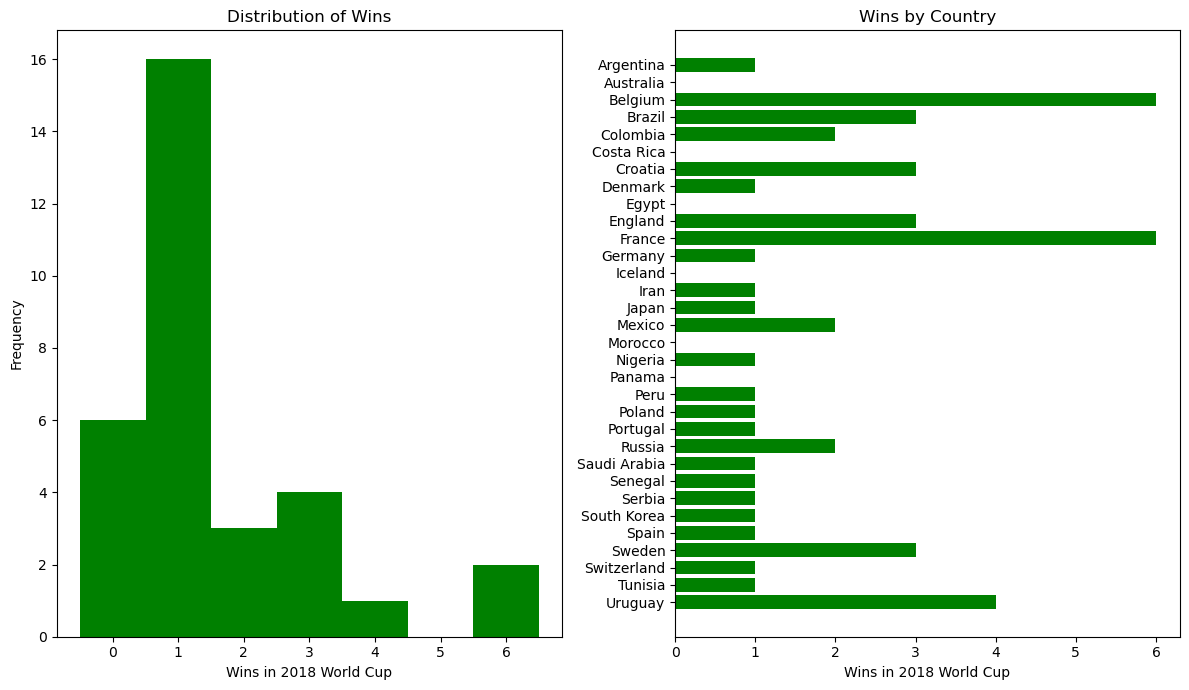

In [56]:
#visualization of wins

import matplotlib.pyplot as plt

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Wins and Frequencies
ax1.hist(x=wins, bins=range(8), align="left", color="green")
ax1.set_xticks(range(7))
ax1.set_xlabel("Wins in 2018 World Cup")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Wins")

# Horizontal Bar Graph of Wins by Country
ax2.barh(teams[::-1], wins[::-1], color="green")
ax2.set_xlabel("Wins in 2018 World Cup")
ax2.set_title("Wins by Country");

In [57]:
#Associating countries with 2018 Population

# Run this cell without changes
len(population_data)

16930

In [58]:
np.random.seed(42)
population_record_samples = np.random.choice(population_data, size=10)
population_record_samples

array([{'Country Name': 'Turks and Caicos Islands', 'Country Code': 'TCA', 'Year': '2011', 'Value': '30846'},
       {'Country Name': 'Australia', 'Country Code': 'AUS', 'Year': '1988', 'Value': '16532164'},
       {'Country Name': 'French Polynesia', 'Country Code': 'PYF', 'Year': '1974', 'Value': '129960'},
       {'Country Name': 'Pacific island small states', 'Country Code': 'PSS', 'Year': '2020', 'Value': '2595522'},
       {'Country Name': 'Nicaragua', 'Country Code': 'NIC', 'Year': '1980', 'Value': '3252403'},
       {'Country Name': 'Guinea-Bissau', 'Country Code': 'GNB', 'Year': '2017', 'Value': '1877072'},
       {'Country Name': 'Zambia', 'Country Code': 'ZMB', 'Year': '2008', 'Value': '13021324'},
       {'Country Name': 'Equatorial Guinea', 'Country Code': 'GNQ', 'Year': '1970', 'Value': '320803'},
       {'Country Name': 'St. Lucia', 'Country Code': 'LCA', 'Year': '1983', 'Value': '125044'},
       {'Country Name': 'Niger', 'Country Code': 'NER', 'Year': '1995', 'Value': 

In [65]:
#Filtering population data

population_data_filtered = []

for record in population_data:
    if record['Country Name']in teams and record['Year']=='2018':
     population_data_filtered.append(record)

len(population_data_filtered)

27

In [75]:
population_record_samples[2]

{'Country Name': 'French Polynesia',
 'Country Code': 'PYF',
 'Year': '1974',
 'Value': '129960'}

In [77]:
#Normalizing location in Population data

# Run this cell without changes
def normalize_location(country_name):
    """
    Given a country name, return the name that the
    country uses when playing in the FIFA World Cup
    """
    name_sub_dict = {
        "Russian Federation": "Russia",
        "Egypt, Arab Rep.": "Egypt",
        "Iran, Islamic Rep.": "Iran",
        "Korea, Rep.": "South Korea",
        "United Kingdom": "England",
    }
    # The .get method returns the corresponding value from
    # the dict if present, otherwise returns country_name
    return name_sub_dict.get(country_name, country_name)


# Example where normalized location is different
print(normalize_location("Russian Federation"))
# Example where normalized location is the same
print(normalize_location("Argentina"))

Russia
Argentina


In [94]:
#rewrite the normalized country name

population_data_filtered = []

for record in population_data:
    # Get normalized country name
    normalized_name = normalize_location(record["Country Name"])
    
    # Add record to population_data_filtered if relevant
    if normalized_name in teams and record["Year"] == "2018":
        # Replace the country name in the record
        record["Country Name"] = normalized_name
        # Append to list
        population_data_filtered.append(record)

len(population_data_filtered)


32

In [93]:
#Type Conversion of Population Data

population_data_filtered[0]


{'Country Name': 'Argentina',
 'Country Code': 'ARG',
 'Year': '2018',
 'Value': '44654882'}

In [95]:
#Convert population values into integers

for record in population_data_filtered:
    record["Value"]=int(record["Value"])

population_data_filtered[-1]

{'Country Name': 'Uruguay',
 'Country Code': 'URY',
 'Year': '2018',
 'Value': 3394534}

In [96]:
assert type(population_data_filtered[-1]["Value"]) == int

In [97]:
#Adding Population Data

combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

In [98]:
for record in population_data_filtered:
    country=record["Country Name"]
    population = record["Value"]
    combined_data[country]["population"]=population

combined_data

{'Argentina': {'wins': 1, 'population': 44654882},
 'Australia': {'wins': 0, 'population': 24963258},
 'Belgium': {'wins': 6, 'population': 11427054},
 'Brazil': {'wins': 3, 'population': 206107261},
 'Colombia': {'wins': 2, 'population': 49024465},
 'Costa Rica': {'wins': 0, 'population': 4957818},
 'Croatia': {'wins': 3, 'population': 3988775},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 105682094},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 67158348},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 86117998},
 'Japan': {'wins': 1, 'population': 126811000},
 'Mexico': {'wins': 2, 'population': 124573711},
 'Morocco': {'wins': 0, 'population': 35839760},
 'Nigeria': {'wins': 1, 'population': 204938755},
 'Panama': {'wins': 0, 'population': 4167860},
 'Peru': {'wins': 1, 'population': 31897584},
 'Poland': {'wins': 1, 'pop

In [99]:
assert type(combined_data["Uruguay"]) == dict
assert type(combined_data["Uruguay"]["population"]) == int

In [100]:
#ANALYSIS OF POPULATION

populations = [val["population"] for val in combined_data.values()]

print("Mean population:", np.mean(populations))
print("Median population:", np.median(populations))
print("Standard deviation of population:", np.std(populations))

Mean population: 52087674.0625
Median population: 33868672.0
Standard deviation of population: 55976928.13479507


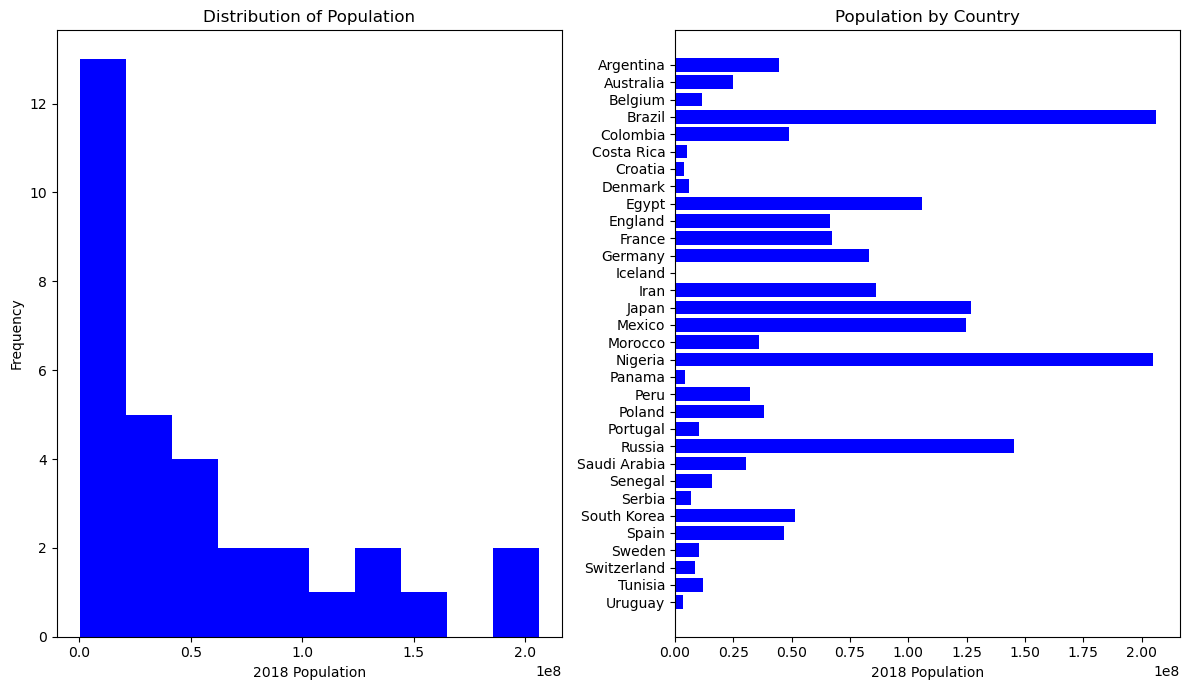

In [101]:
#Visualization of population:

# Run this cell without changes

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Populations and Frequencies
ax1.hist(x=populations, color="blue")
ax1.set_xlabel("2018 Population")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Population")

# Horizontal Bar Graph of Population by Country
ax2.barh(teams[::-1], populations[::-1], color="blue")
ax2.set_xlabel("2018 Population")
ax2.set_title("Population by Country");

In [104]:
#ANALYSIS OF POPULATION vs PERFORMANCE

np.corrcoef(wins, populations)[0][1]

0.06688156766055764

In [105]:
#It is 0.0668 means no correlation between population and the world cup wins 2018

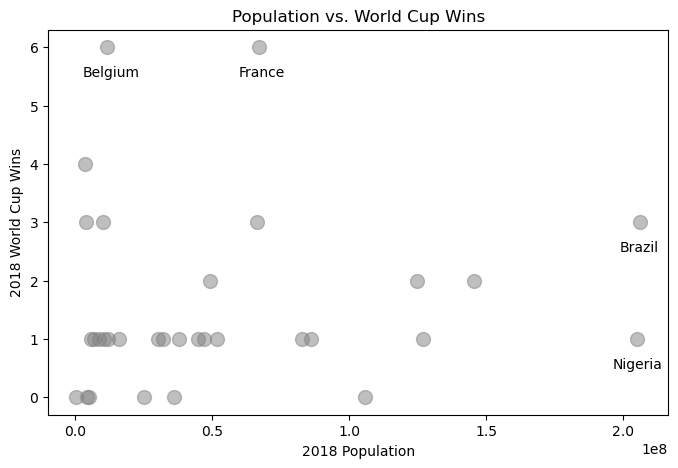

In [107]:
#Data Visualization

# Run this cell without changes

# Set up figure
fig, ax = plt.subplots(figsize=(8, 5))

# Basic scatter plot
ax.scatter(x=populations, y=wins, color="gray", alpha=0.5, s=100)
ax.set_xlabel("2018 Population")
ax.set_ylabel("2018 World Cup Wins")
ax.set_title("Population vs. World Cup Wins")

# Add annotations for specific points of interest
highlighted_points = {
    "Belgium": 2,  # Numbers are the index of that
    "Brazil": 3,  # country in populations & wins
    "France": 10,
    "Nigeria": 17,
}
for country, index in highlighted_points.items():
    # Get x and y position of data point
    x = populations[index]
    y = wins[index]
    # Move each point slightly down and to the left
    # (numbers were chosen by manually tweaking)
    xtext = x - (1.25e6 * len(country))
    ytext = y - 0.5
    # Annotate with relevant arguments
    ax.annotate(text=country, xy=(x, y), xytext=(xtext, ytext))

In [111]:
"""The scatter plot shows the number of World Cup wins in 2018 on the y-axis and the population of each country on the x-axis.

From the plot, we can see that:
There is no clear pattern — countries with big populations don’t always win more games.
For example, Belgium and France had a lot of wins, but their populations are not big.
Countries with huge populations like Nigeria and Brazil had fewer wins than Belgium or France.

This matches what we saw from the correlation number, which was close to 0 which means there is no strong relationship between population and winning in the 2018 World Cup."""

'The scatter plot shows the number of World Cup wins in 2018 on the y-axis and the population of each country on the x-axis.\n\nFrom the plot, we can see that:\nThere is no clear pattern — countries with big populations don’t always win more games.\nFor example, Belgium and France had a lot of wins, but their populations are not big.\nCountries with huge populations like Nigeria and Brazil had fewer wins than Belgium or France.\n\nThis matches what we saw from the correlation number, which was close to 0 which means there is no strong relationship between population and winning in the 2018 World Cup.'

In [110]:
"""
We found that there is not a strong connection between how big a country’s population is and how well they did in the 2018 World Cup.

Why might this happen?
- Big populations don’t always mean better teams. Some smaller countries have really good football programs.
- Countries like Belgium and Croatia have fewer people but still performed very well.

In short: population doesn’t seem to make a big difference for winning in the World Cup, at least in 2018!
"""

'\nWe found that there is not a strong connection between how big a country’s population is and how well they did in the 2018 World Cup.\n\nWhy might this happen?\n- Big populations don’t always mean better teams. Some smaller countries have really good football programs.\n- Countries like Belgium and Croatia have fewer people but still performed very well.\n\nIn short: population doesn’t seem to make a big difference for winning in the World Cup, at least in 2018!\n'